In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
aws = pd.read_csv("./data/AWS_sample.txt", sep = "#")
aws.head(2)

,AWS_ID,TM,TA,Wind,X.
0,108,2016-07-01 00,24.2,2.3,=
1,108,2016-07-01 01,24.3,2.3,=


In [5]:
aws["TA"][:100]

0     24.2
1     24.3
2     23.7
3     23.3
4     23.5
      ... 
95    20.4
96    20.2
97    20.2
98    20.4
99    20.9
Name: TA, Length: 100, dtype: float64

<AxesSubplot:>

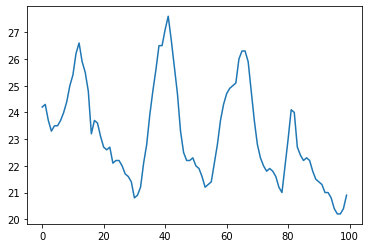

In [8]:
aws["TA"][:100].plot()

<AxesSubplot:>

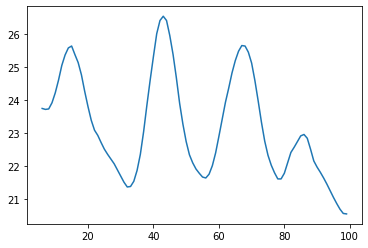

In [9]:
aws["TA"][:100].rolling(window = 7).mean().plot()

In [15]:
aws["MA_3"] = aws["TA"].rolling(window = 3).mean()
aws["MA_12"] = aws["TA"].rolling(window = 12).mean()
aws["MA_24"] = aws["TA"].rolling(window = 24).mean()

In [16]:
aws.head(25)

,AWS_ID,TM,TA,Wind,X.,MA_3,MA_12,MA_24
0,108,2016-07-01 00,24.2,2.3,=,NaN,NaN,NaN
1,108,2016-07-01 01,24.3,2.3,=,NaN,NaN,NaN
2,108,2016-07-01 02,23.7,3.8,=,24.066667,NaN,NaN
3,108,2016-07-01 03,23.3,3.0,=,23.766667,NaN,NaN
4,108,2016-07-01 04,23.5,2.1,=,23.500000,NaN,NaN
5,108,2016-07-01 05,23.5,2.7,=,23.433333,NaN,NaN
6,108,2016-07-01 06,23.7,2.1,=,23.566667,NaN,NaN
7,108,2016-07-01 07,24.0,0.3,=,23.733333,NaN,NaN
8,108,2016-07-01 08,24.4,2.1,=,24.033333,NaN,NaN
9,108,2016-07-01 09,25.0,2.2,=,24.466667,NaN,NaN


<AxesSubplot:>

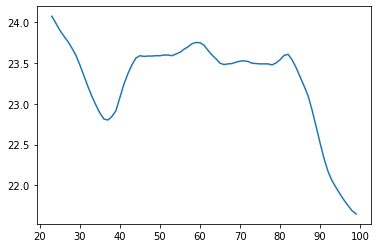

In [17]:
aws["MA_24"][:100].plot()

In [18]:
aws.columns

Index(['AWS_ID', 'TM', 'TA', 'Wind', 'X.', 'MA_3', 'MA_12', 'MA_24'], dtype='object')

<AxesSubplot:>

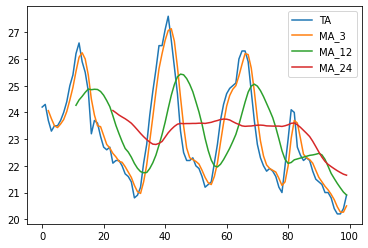

In [19]:
aws.iloc[:100, [2,5,6,7]].plot()

In [20]:
aws.head(2)

,AWS_ID,TM,TA,Wind,X.,MA_3,MA_12,MA_24
0,108,2016-07-01 00,24.2,2.3,=,NaN,NaN,NaN
1,108,2016-07-01 01,24.3,2.3,=,NaN,NaN,NaN


In [21]:
aws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5886 entries, 0 to 5885
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AWS_ID  5886 non-null   int64  
 1   TM      5886 non-null   object 
 2   TA      5886 non-null   float64
 3   Wind    5886 non-null   float64
 4   X.      5886 non-null   object 
 5   MA_3    5884 non-null   float64
 6   MA_12   5875 non-null   float64
 7   MA_24   5863 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 368.0+ KB


In [22]:
# aws["TM"] = pd.to_datetime(aws["TM"], format = "%Y-%m-%d %H")
aws["TM"] = pd.to_datetime(aws["TM"])

In [23]:
aws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5886 entries, 0 to 5885
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   AWS_ID  5886 non-null   int64         
 1   TM      5886 non-null   datetime64[ns]
 2   TA      5886 non-null   float64       
 3   Wind    5886 non-null   float64       
 4   X.      5886 non-null   object        
 5   MA_3    5884 non-null   float64       
 6   MA_12   5875 non-null   float64       
 7   MA_24   5863 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 368.0+ KB


In [24]:
aws = aws.set_index(aws["TM"])
aws.head(2)

,AWS_ID,TM,TA,Wind,X.,MA_3,MA_12,MA_24
TM,,,,,,,,
2016-07-01 00:00:00,108,2016-07-01 00:00:00,24.2,2.3,=,NaN,NaN,NaN
2016-07-01 01:00:00,108,2016-07-01 01:00:00,24.3,2.3,=,NaN,NaN,NaN


In [25]:
dec = seasonal_decompose(aws["TA"][:100])
dec

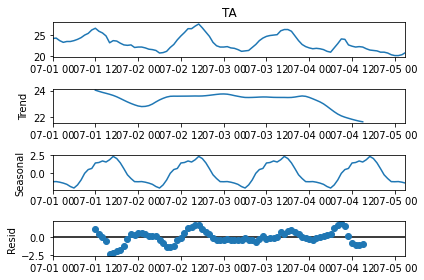

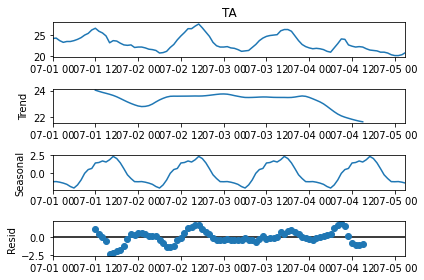

In [26]:
dec.plot()

In [28]:
dec.trend[:30]

TM
2016-07-01 00:00:00          NaN
2016-07-01 01:00:00          NaN
2016-07-01 02:00:00          NaN
2016-07-01 03:00:00          NaN
2016-07-01 04:00:00          NaN
2016-07-01 05:00:00          NaN
2016-07-01 06:00:00          NaN
2016-07-01 07:00:00          NaN
2016-07-01 08:00:00          NaN
2016-07-01 09:00:00          NaN
2016-07-01 10:00:00          NaN
2016-07-01 11:00:00          NaN
2016-07-01 12:00:00    24.029167
2016-07-01 13:00:00    23.943750
2016-07-01 14:00:00    23.864583
2016-07-01 15:00:00    23.795833
2016-07-01 16:00:00    23.722917
2016-07-01 17:00:00    23.639583
2016-07-01 18:00:00    23.535417
2016-07-01 19:00:00    23.410417
2016-07-01 20:00:00    23.279167
2016-07-01 21:00:00    23.152083
2016-07-01 22:00:00    23.037500
2016-07-01 23:00:00    22.935417
2016-07-02 00:00:00    22.850000
2016-07-02 01:00:00    22.806250
2016-07-02 02:00:00    22.820833
2016-07-02 03:00:00    22.877083
2016-07-02 04:00:00    22.993750
2016-07-02 05:00:00    23.156250
Name: t